In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.manifold import TSNE
#from sklearn.decomposition import PCA, TruncatedSVD
#import matplotlib.patches as mpatches
#import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#import collections


# Other Libraries
'''from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")'''


#df = pd.read_csv('transactions.csv')
#df.head()

'from sklearn.model_selection import train_test_split\nfrom sklearn.pipeline import make_pipeline\nfrom imblearn.pipeline import make_pipeline as imbalanced_make_pipeline\nfrom imblearn.over_sampling import SMOTE\nfrom imblearn.under_sampling import RandomUnderSampler\nfrom imblearn.metrics import classification_report_imbalanced\nfrom sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report\nfrom collections import Counter\nfrom sklearn.model_selection import KFold, StratifiedKFold\nimport warnings\nwarnings.filterwarnings("ignore")'

In [2]:
#importing Dataset

df =pd.read_csv('produce.csv')
#df .head(10)
df

,Particulars,Frequency,Unit,3-1993,3-1994,3-1995,3-1996,3-1997,3-1998,3-1999,...,3-2005,3-2006,3-2007,3-2008,3-2009,3-2010,3-2011,3-2012,3-2013,3-2014
0,Agricultural Production Foodgrains,"Annual, Ending mar Of Each Year",Ton mn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,198.36282,208.6016,217.28212,230.77504,234.466177,218.107372,244.491809,259.286253,257.13,264.3806
1,Agricultural Production Foodgrains Kharif,"Annual, Ending mar Of Each Year",Ton mn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,103.30942,109.8734,110.57622,120.95724,118.138577,103.954032,120.853191,131.274812,128.07,129.3686
2,Agricultural Production Foodgrains Rabi,"Annual, Ending mar Of Each Year",Ton mn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95.05340,98.7282,106.70590,109.81780,116.327600,114.153340,123.638618,128.011441,129.06,135.0120
3,Agricultural Production Foodgrains Rice,"Annual, Ending mar Of Each Year",Ton mn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,83.13170,91.7934,93.35530,96.69290,99.182500,89.092901,95.979819,105.301100,105.24,106.2872
4,Agricultural Production Foodgrains Rice Kharif,"Annual, Ending mar Of Each Year",Ton mn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,72.23000,78.2719,80.17080,82.65940,84.908200,75.916510,80.651241,92.780700,92.37,92.0093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,Agricultural Production Foodgrains Coarse Cere...,"Annual, Ending mar Of Each Year",kg/ha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,778.00000,669.0000,807.00000,1015.00000,1031.000000,541.000000,1051.000000,1080.000000,1156.00,NaN
425,Agricultural Production Foodgrains Coarse Cere...,"Annual, Ending mar Of Each Year",kg/ha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1054.00000,985.0000,1951.00000,1943.00000,2424.000000,2516.000000,2476.000000,3625.000000,2357.00,NaN
426,Agricultural Production Foodgrains Coarse Cere...,"Annual, Ending mar Of Each Year",kg/ha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1577.00000,1383.0000,1404.00000,1454.00000,1550.000000,1541.000000,1563.000000,1759.000000,1845.00,NaN
427,Agricultural Production Foodgrains Coarse Cere...,"Annual, Ending mar Of Each Year",kg/ha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1222.00000,1188.0000,1318.00000,1319.00000,1280.000000,1160.000000,1328.000000,1320.000000,1360.00,NaN


In [3]:
df.describe()

,3-1993,3-1994,3-1995,3-1996,3-1997,3-1998,3-1999,3-2000,3-2001,3-2002,...,3-2005,3-2006,3-2007,3-2008,3-2009,3-2010,3-2011,3-2012,3-2013,3-2014
count,3.0,4.0,4.0,6.000000,10.000000,10.000000,11.000000,20.000000,22.000000,36.000000,...,425.000000,423.000000,418.000000,417.000000,418.000000,403.000000,404.000000,388.000000,298.000000,63.000000
mean,0.0,0.0,0.0,6.753000,1310.623000,1276.252000,1146.230909,621.747000,588.115000,425.641667,...,1103.899915,1136.604858,1146.262067,1213.930482,1234.754599,1144.015426,1228.541458,1352.353707,1355.741134,252.303495
std,0.0,0.0,0.0,16.337482,4128.680346,4019.889103,3777.583647,2708.616162,2682.320751,2152.677440,...,3910.204724,3925.459550,3936.081939,4046.762259,4146.021269,4054.786966,4186.449378,4366.571068,2950.845362,670.745277
min,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.060000,0.060000,0.050000,0.058400,0.045000,0.050000,0.050000,0.087500
25%,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.390000,0.367500,2.400000,...,5.100000,5.589950,5.717500,5.748600,5.827500,5.378950,5.632750,5.780000,4.322500,2.853700
50%,0.0,0.0,0.0,0.000000,0.215000,0.230000,0.460000,4.050000,4.920000,15.850000,...,36.800000,36.520000,37.715000,40.760000,42.885000,43.770000,45.500000,43.830000,77.850000,13.451800
75%,0.0,0.0,0.0,0.313500,3.290000,2.875000,14.470000,30.775000,25.575000,81.475000,...,1082.000000,1127.000000,1193.250000,1349.000000,1297.250000,1228.000000,1365.250000,1592.250000,1857.000000,93.929250
max,0.0,0.0,0.0,40.100000,13061.000000,12717.000000,12536.000000,12129.000000,12597.000000,12963.000000,...,65945.000000,64473.000000,64969.000000,66151.000000,67024.000000,67929.000000,68554.000000,69118.000000,30300.000000,3059.000000


In [4]:
df .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Particulars  429 non-null    object 
 1   Frequency    429 non-null    object 
 2   Unit         429 non-null    object 
 3    3-1993      3 non-null      float64
 4    3-1994      4 non-null      float64
 5    3-1995      4 non-null      float64
 6    3-1996      6 non-null      float64
 7    3-1997      10 non-null     float64
 8    3-1998      10 non-null     float64
 9    3-1999      11 non-null     float64
 10   3-2000      20 non-null     float64
 11   3-2001      22 non-null     float64
 12   3-2002      36 non-null     float64
 13   3-2003      128 non-null    float64
 14   3-2004      361 non-null    float64
 15   3-2005      425 non-null    float64
 16   3-2006      423 non-null    float64
 17   3-2007      418 non-null    float64
 18   3-2008      417 non-null    float64
 19   3-2009 

In [5]:
# Good No Null Values!
df.isnull().sum().max()

426

In [6]:
df.columns = df.columns.str.strip ()

In [7]:
df1=df.drop(['3-1993','3-1994','3-1995','3-1996','3-1997','3-1998','3-1999','3-2000','3-2001','3-2002','3-2003','3-2004','3-2014'], axis=1)

In [8]:
df1.head()

,Particulars,Frequency,Unit,3-2005,3-2006,3-2007,3-2008,3-2009,3-2010,3-2011,3-2012,3-2013
0,Agricultural Production Foodgrains,"Annual, Ending mar Of Each Year",Ton mn,198.36282,208.6016,217.28212,230.77504,234.466177,218.107372,244.491809,259.286253,257.13
1,Agricultural Production Foodgrains Kharif,"Annual, Ending mar Of Each Year",Ton mn,103.30942,109.8734,110.57622,120.95724,118.138577,103.954032,120.853191,131.274812,128.07
2,Agricultural Production Foodgrains Rabi,"Annual, Ending mar Of Each Year",Ton mn,95.05340,98.7282,106.70590,109.81780,116.327600,114.153340,123.638618,128.011441,129.06
3,Agricultural Production Foodgrains Rice,"Annual, Ending mar Of Each Year",Ton mn,83.13170,91.7934,93.35530,96.69290,99.182500,89.092901,95.979819,105.301100,105.24
4,Agricultural Production Foodgrains Rice Kharif,"Annual, Ending mar Of Each Year",Ton mn,72.23000,78.2719,80.17080,82.65940,84.908200,75.916510,80.651241,92.780700,92.37


In [9]:
# Good No Null Values!
df1.isnull().sum().max()

131

In [10]:
df1.dropna(inplace=True)

In [11]:
# Good No Null Values!
df1.isnull().sum().max()

0

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

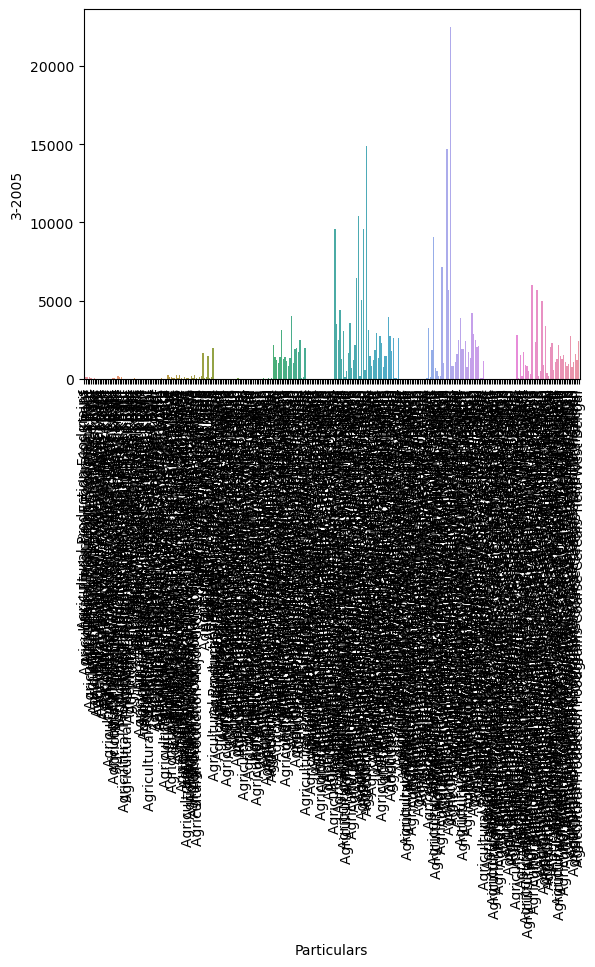

In [32]:
sns.barplot(x="Particulars", y="3-2005", data=df1)
plt.xticks(rotation = 90)

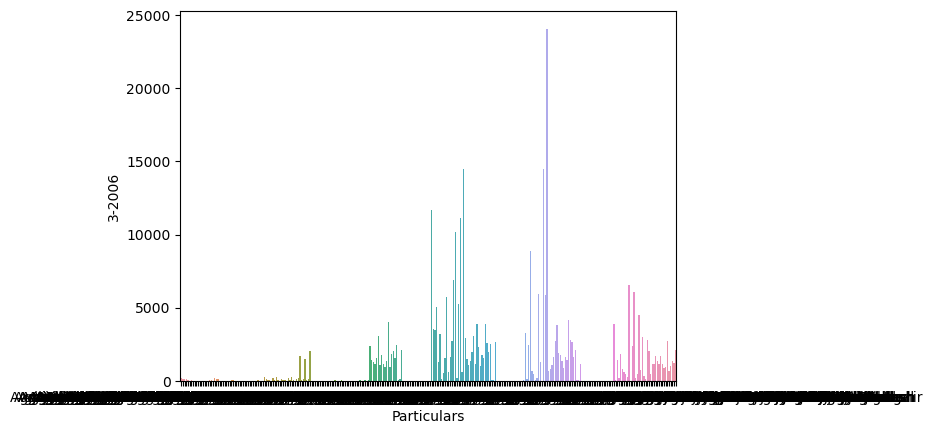

In [33]:
sns.barplot(x="Particulars", y="3-2006", data=df1)
#plt.xticks(rotation = 90)
plt.show()

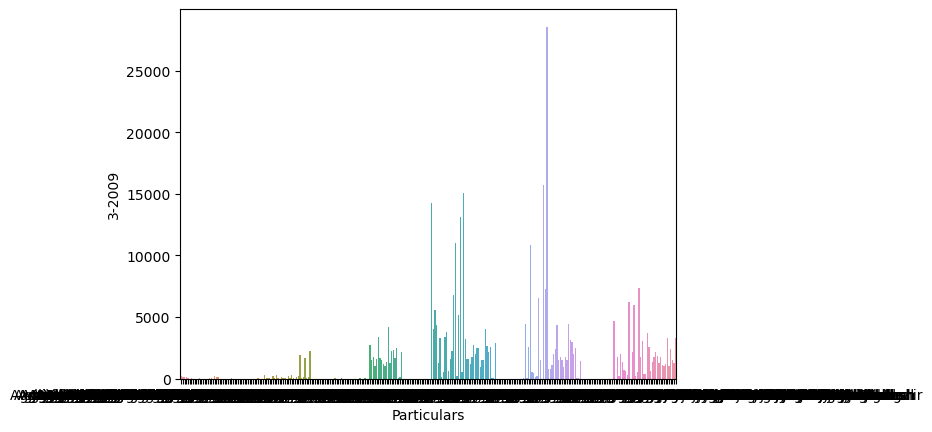

In [34]:
sns.barplot(x="Particulars", y="3-2009", data=df1)
#plt.xticks(rotation = 90)
plt.show()

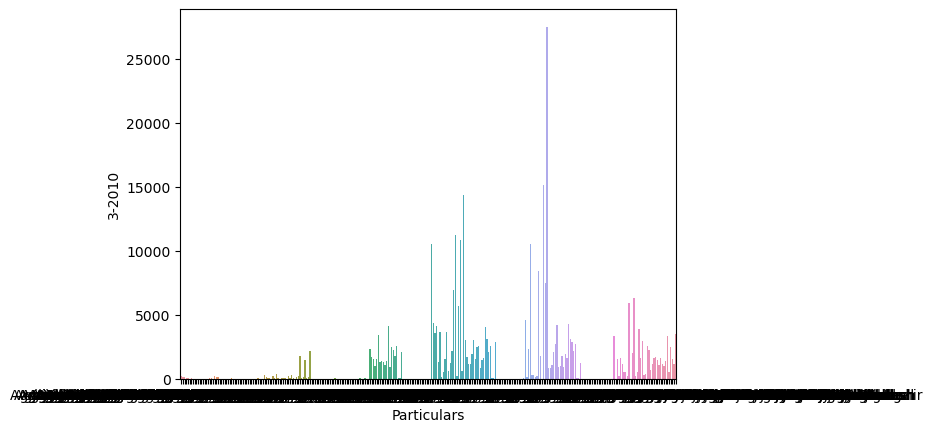

In [35]:
sns.barplot(x="Particulars", y="3-2010", data=df1)
#plt.xticks(rotation = 90)
plt.show()

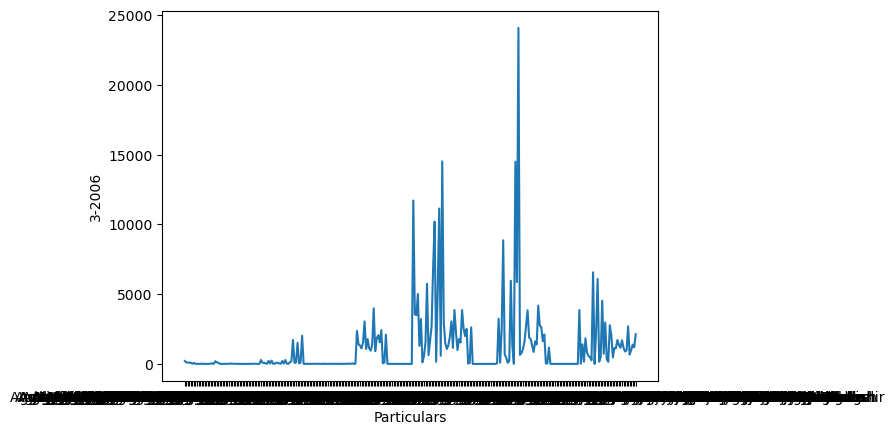

In [36]:
sns.lineplot(x="Particulars", y="3-2006", data=df1)
#plt.xticks(rotation = 90)
plt.show()

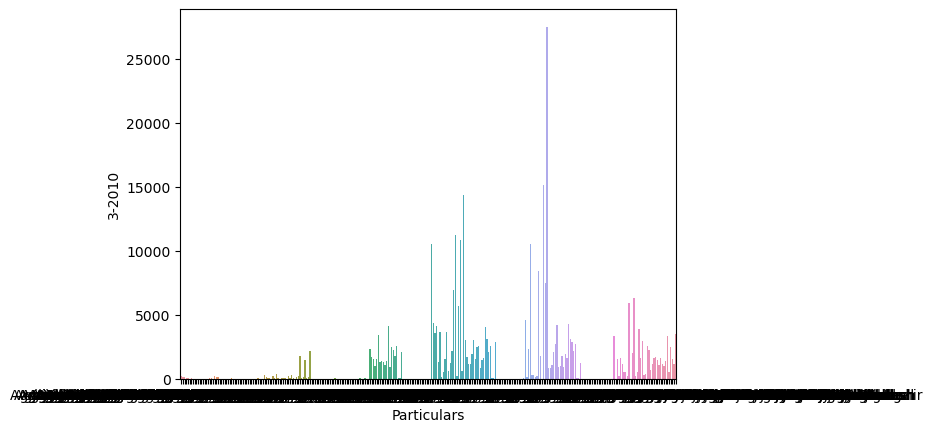

In [37]:
sns.barplot(x="Particulars", y="3-2010", data=df1)
#plt.xticks(rotation = 90)
plt.show()

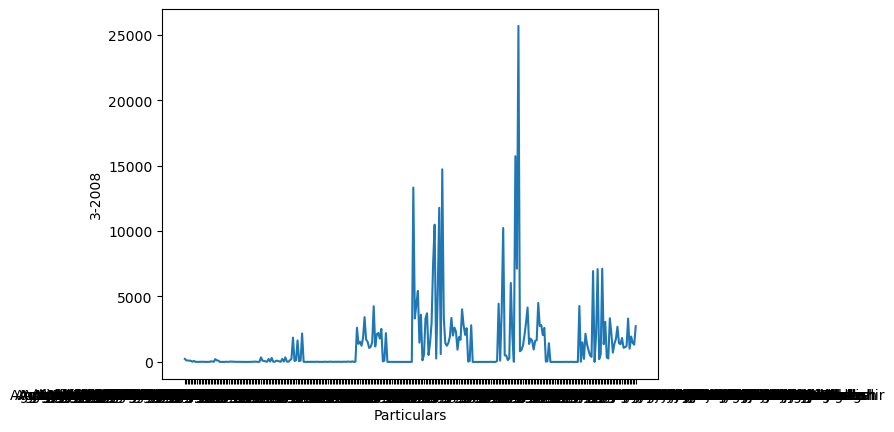

In [43]:
sns.lineplot(x="Particulars", y="3-2008", data=df1)
#plt.xticks(rotation = 90)
plt.show()

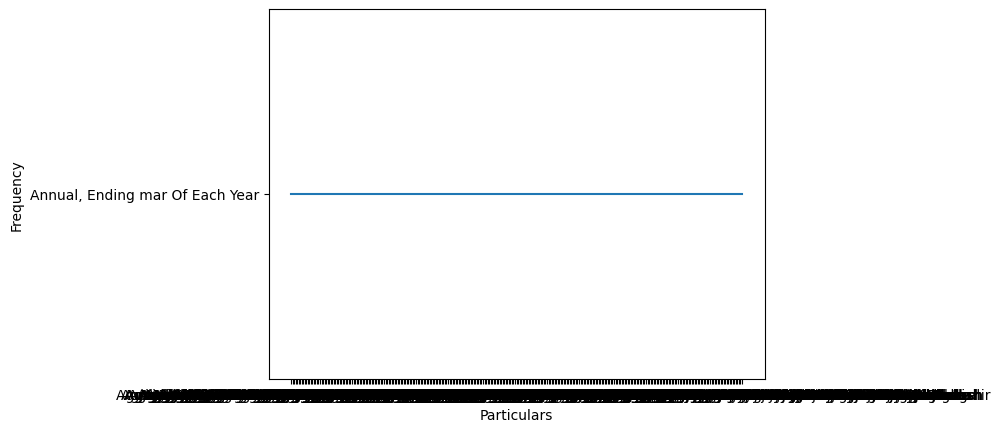

In [45]:
sns.lineplot(x="Particulars", y="Frequency", data=df1)
#plt.xticks(rotation = 90)
plt.show()

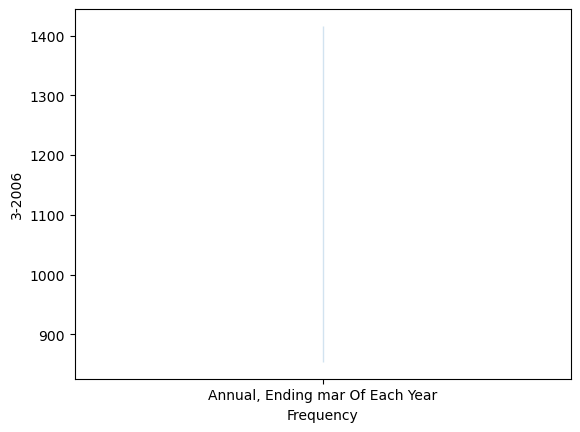

In [46]:
sns.lineplot(x="Frequency", y="3-2006", data=df1)
#plt.xticks(rotation = 90)
plt.show()

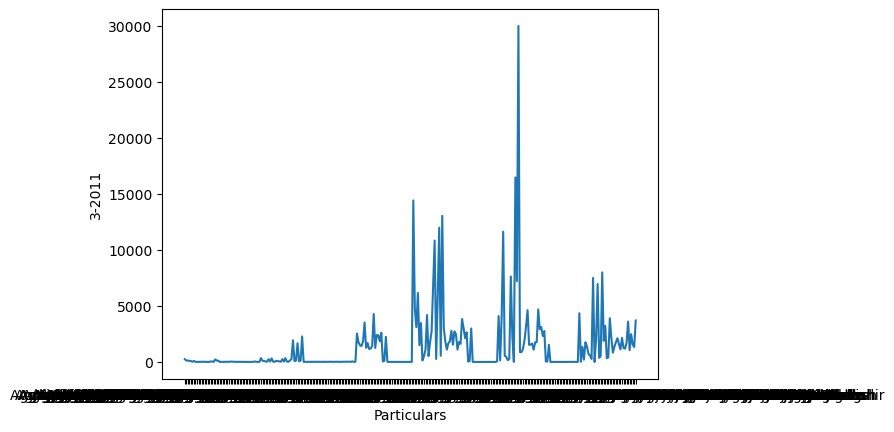

In [47]:
sns.lineplot(x="Particulars", y="3-2011", data=df1)
#plt.xticks(rotation = 90)
plt.show()

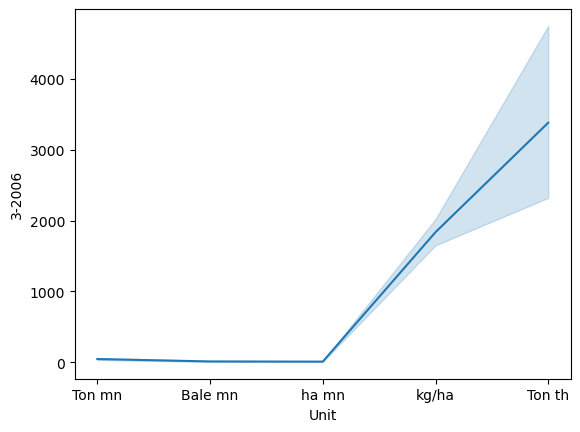

In [49]:
sns.lineplot(x="Unit", y="3-2006", data=df1)
#plt.xticks(rotation = 90)
plt.show()

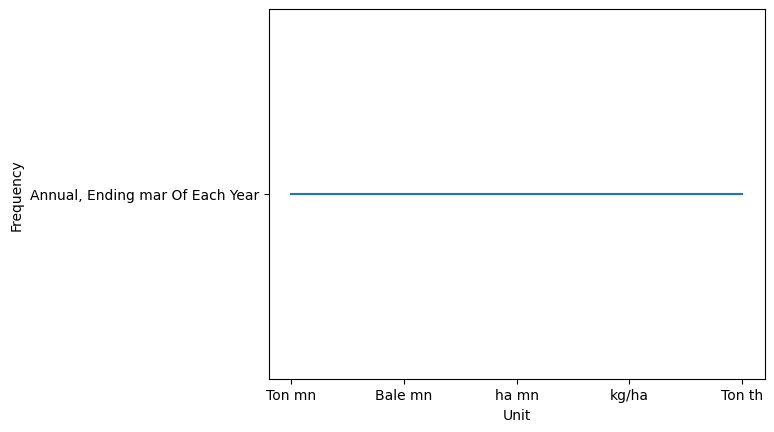

In [50]:
sns.lineplot(x="Unit", y="Frequency", data=df1)
#plt.xticks(rotation = 90)
plt.show()

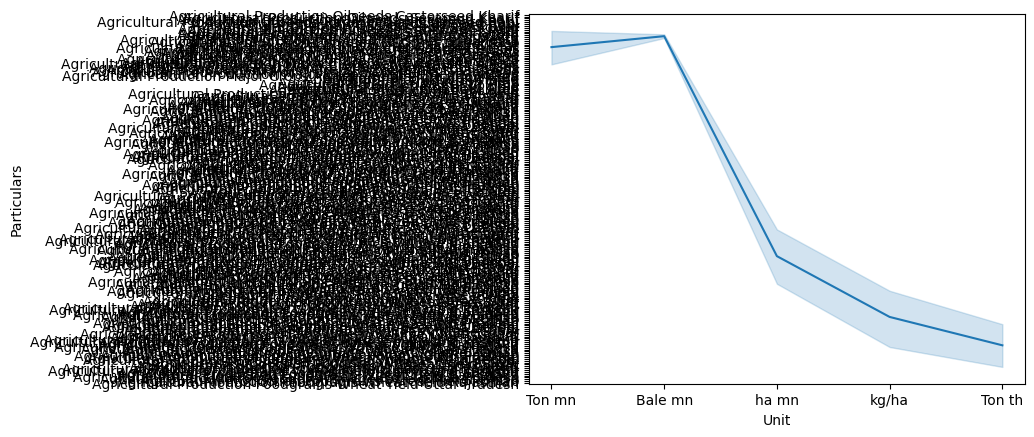

In [51]:
sns.lineplot(x="Unit", y="Particulars", data=df1)

plt.show()

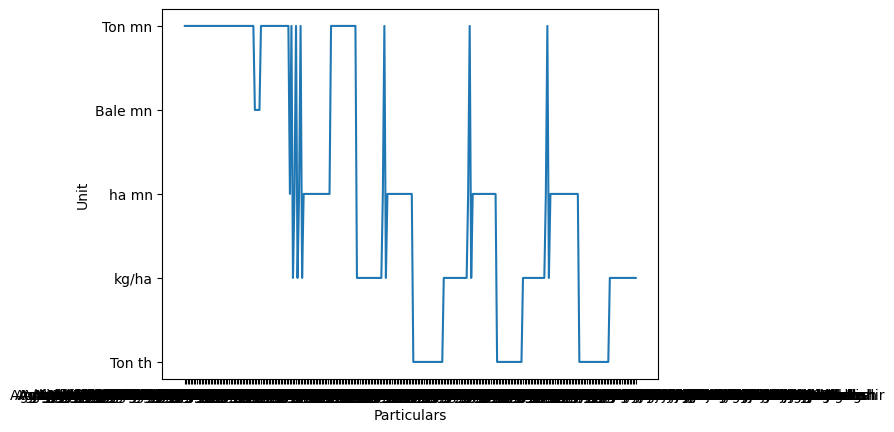

In [52]:
sns.lineplot(x="Particulars", y="Unit", data=df1)

plt.show()

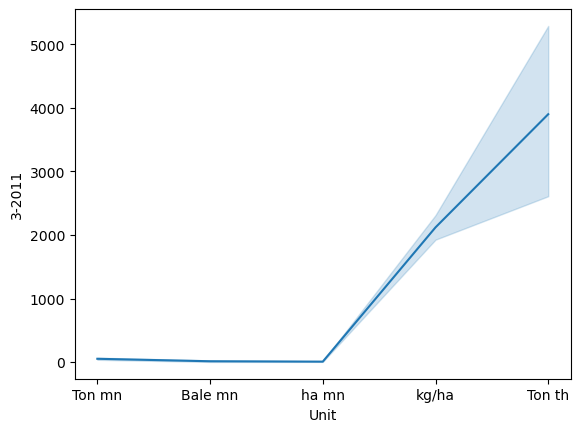

In [55]:
sns.lineplot(x="Unit", y="3-2011", data=df1)
#plt.xticks(rotation = 90)
plt.show()

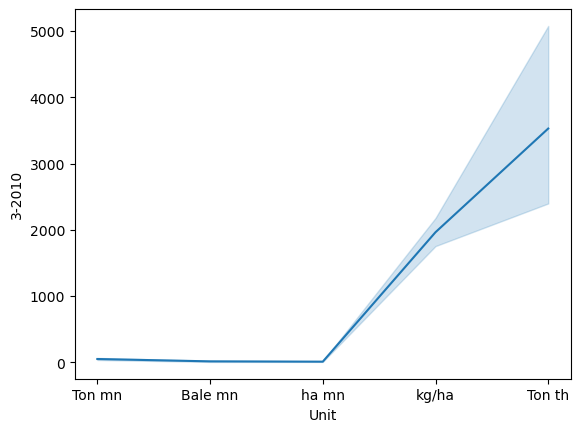

In [56]:
sns.lineplot(x="Unit", y="3-2010", data=df1)
#plt.xticks(rotation = 90)
plt.show()

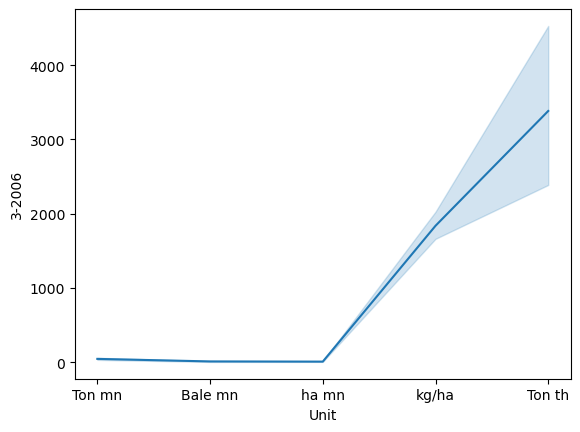

In [57]:
sns.lineplot(x="Unit", y="3-2006", data=df1)
#plt.xticks(rotation = 90)
plt.show()

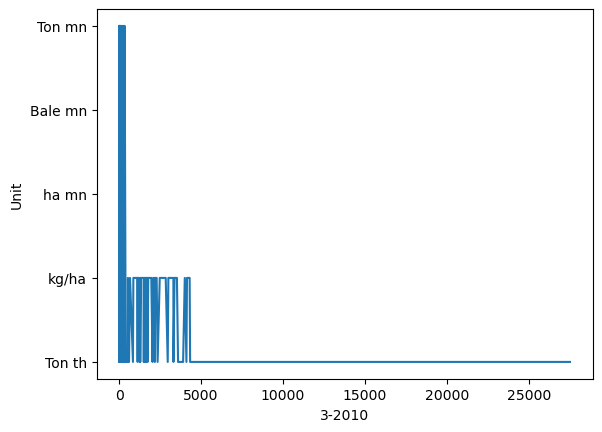

In [58]:
sns.lineplot(y="Unit", x="3-2010", data=df1)
#plt.xticks(rotation = 90)
plt.show()